# Yash Pilankar



# Research Question: If the given website is safe for browsing or not?

In [231]:
#import all requried libraries
#pip install python-twitter
import pandas as pd
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.feature_selection import f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,f1_score,recall_score,precision_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

#read data
data = pd.read_csv('phishing_data.csv')
print("Initialized and loading required libraries. Loaded data from CSV Files")

Initialized and loading required libraries. Loaded data from CSV Files


# Data Cleaning, Pre-processing & Transformation

In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11481 entries, 0 to 11480
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11481 non-null  object 
 1   length_url                  11481 non-null  int64  
 2   length_hostname             11481 non-null  int64  
 3   ip                          11481 non-null  object 
 4   nb_dots                     11481 non-null  int64  
 5   nb_hyphens                  11481 non-null  object 
 6   nb_at                       11481 non-null  int64  
 7   nb_qm                       11481 non-null  int64  
 8   nb_and                      11481 non-null  int64  
 9   nb_or                       11481 non-null  int64  
 10  nb_eq                       11481 non-null  int64  
 11  nb_underscore               11481 non-null  int64  
 12  nb_tilde                    11481 non-null  int64  
 13  nb_percent                  114

In [233]:
data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.progarchives.com/album.asp?id=61737,46,20,zero,3,zero,0,1,0,0,...,1,one,0,627,6678,78526,0,0,5,phishing
1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,128,120,0,10,0,0,0,0,0,...,1,zero,0,300,65,0,0,1,0,phishing
2,http://www.avevaconstruction.com/blesstool/ima...,52,25,0,3,0,0,0,0,0,...,1,zero,0,119,1707,0,0,1,0,phishing
3,http://www.jp519.com/,21,13,0,2,0,0,0,0,0,...,1,one,0,130,1331,0,0,0,0,legitimate
4,https://www.velocidrone.com/,28,19,0,2,0,0,0,0,0,...,0,zero,0,164,1662,312044,0,0,4,legitimate


In [234]:
print("Checking Unique values as per above info data are in object form")
print("Unqiue Values in IP: {}".format(set(list(data['ip']))))
print("Unqiue Values in nb_hyphens: {}".format(set(list(data['nb_hyphens']))))
print("Unqiue Values in domain_with_copyright: {}".format(set(list(data['domain_with_copyright']))))
print("Replacing string zero/one with numeric 0/1.")
#Change Url details to 1 if URL exists else 0 
data[['ip','nb_hyphens','domain_with_copyright']] = data[['ip','nb_hyphens','domain_with_copyright']].replace({'zero': 0,'Zero':0,'one':1,'One':1})
print("Check for column having Null Values")
if len(data.columns[data.isna().any()].tolist()) ==0:
    print("No Null Values")
else:
    print("Null value column".format(data.columns[data.isna().any()].tolist()))
print("Change of Object to Integer")
data["ip"] = data["ip"].astype(int)
data["nb_hyphens"] = data["nb_hyphens"].astype(int)
print("Change of Target variable: 'Status' - phishing= 1,legitimate=0")
data['status'] = data['status'].map({'phishing':1 ,'legitimate':0})
print("Check for Duplicate Rows")
#display(data.duplicated(subset=['url']).value_counts())
print("Dropped Duplicate rows")
finalDataset = data.drop_duplicates(subset=['url'], keep='first')
print("Completed")

Checking Unique values as per above info data are in object form
Unqiue Values in IP: {'zero', '0', '1', 'one'}
Unqiue Values in nb_hyphens: {'3', '5', '9', '7', 'zero', '0', '26', '4', '32', '6', '19', '15', 'one', '24', '8', '13', '10', '17', '18', '14', '23', '11', '12', '16', '2', '20', '1'}
Unqiue Values in domain_with_copyright: {'zero', 'one', 'One', 'Zero'}
Replacing string zero/one with numeric 0/1.
Check for column having Null Values
No Null Values
Change of Object to Integer
Change of Target variable: 'Status' - phishing= 1,legitimate=0
Check for Duplicate Rows
Dropped Duplicate rows
Completed


<AxesSubplot:title={'center':'Target Variable phishing= 1,legitimate=0'}, xlabel='status', ylabel='count'>

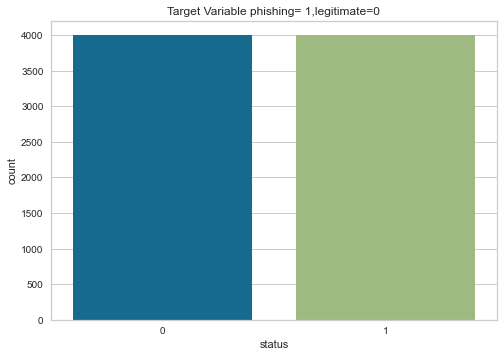

In [235]:
plt.title(label='Target Variable phishing= 1,legitimate=0')
sns.countplot(x ='status', data=finalDataset)

Text(0.5, 0.98, 'Histogram for All Features')

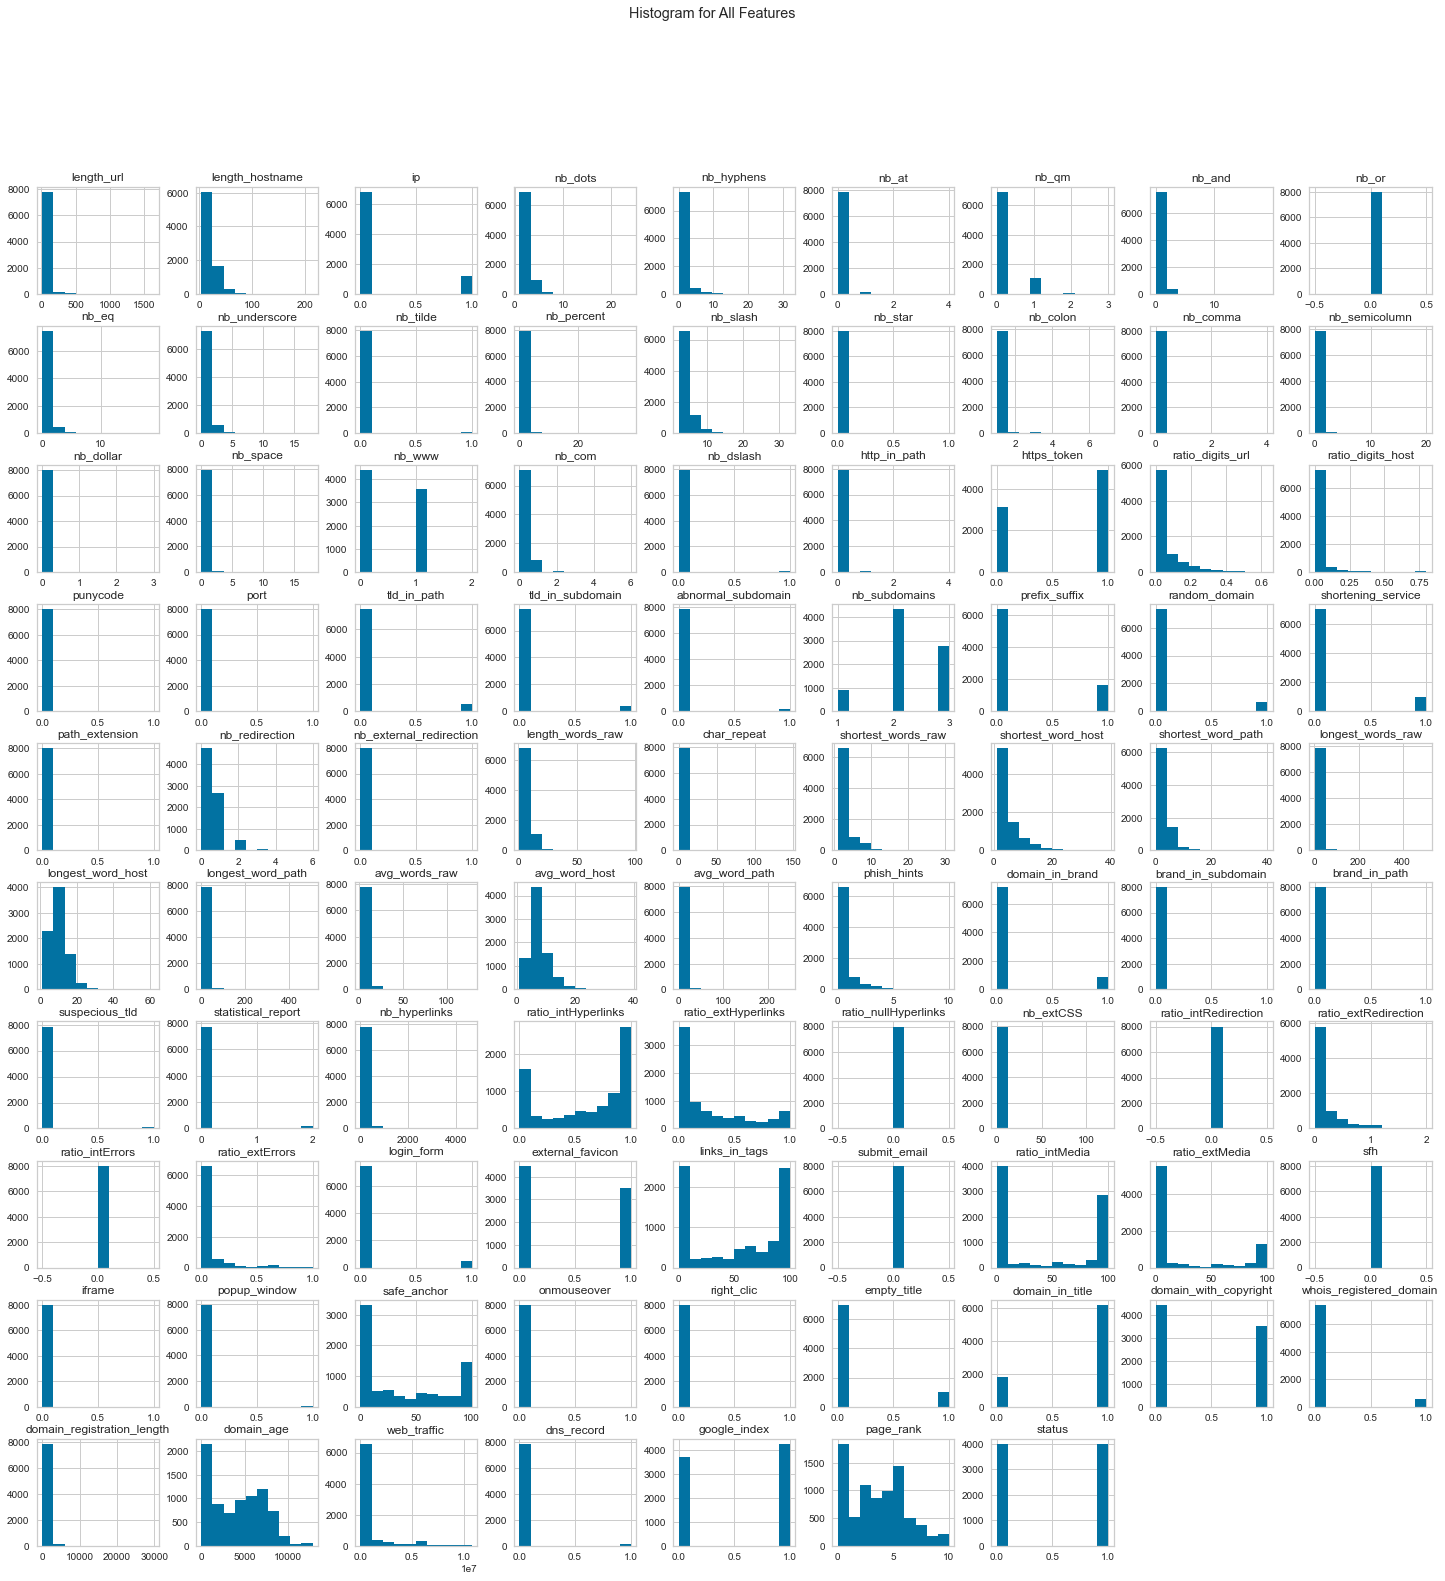

In [236]:
finalDataset.hist(figsize =(25,25))
plt.suptitle("Histogram for All Features")

Text(0.5, 0.98, 'Boxplot for All Features')

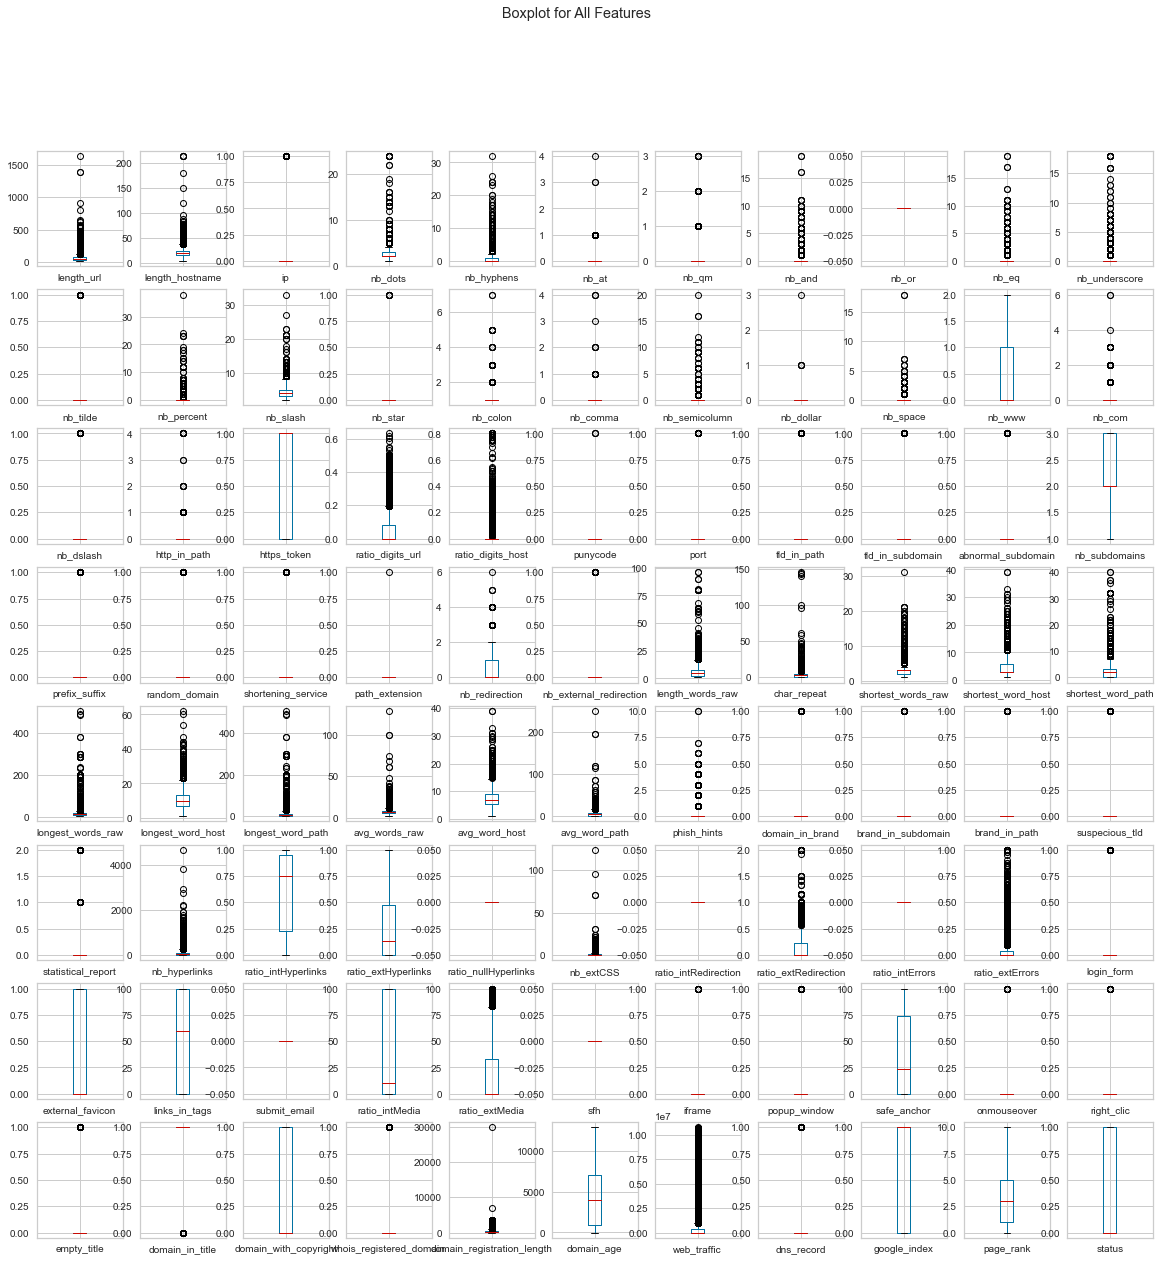

In [237]:
finalDataset.plot(kind='box', figsize=(20,20), layout=(8,11), sharex=False, subplots=True)
plt.suptitle("Boxplot for All Features")

In [238]:
finalDataset.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.0,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8.000000e+03,8000.000000,8000.000000,8000.000000,8000.000000
mean,61.145625,21.116000,0.148875,2.492250,0.99800,0.021375,0.140750,0.168875,0.0,0.300375,...,0.773250,0.441250,0.072875,491.740375,4064.201875,8.635503e+05,0.020625,0.534000,3.196500,0.499875
std,57.484593,10.637114,0.355987,1.403366,2.06065,0.154664,0.365659,0.871608,0.0,1.046918,...,0.418756,0.496567,0.259947,788.158372,3108.176835,2.002024e+06,0.142134,0.498874,2.534352,0.500031
min,13.000000,4.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.000000,0.000000,0.000000,85.000000,967.500000,0.000000e+00,0.000000,0.000000,1.000000,0.000000
50%,47.000000,19.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.000000,0.000000,0.000000,246.000000,4003.000000,2.185000e+03,0.000000,1.000000,3.000000,0.000000
75%,71.000000,24.000000,0.000000,3.000000,1.00000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.000000,1.000000,0.000000,450.000000,7023.750000,3.780940e+05,0.000000,1.000000,5.000000,1.000000
max,1641.000000,214.000000,1.000000,24.000000,32.00000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,29829.000000,12873.000000,1.076799e+07,1.000000,1.000000,10.000000,1.000000


<AxesSubplot:>

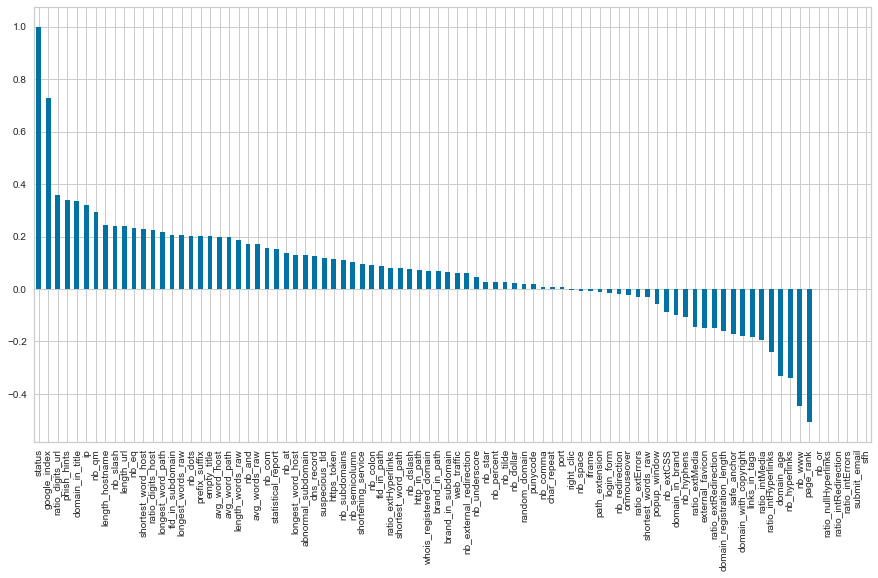

In [239]:
corr_mat = finalDataset.corr()
plt.figure(figsize = (15,8))
corr_mat['status'].sort_values(ascending = False).plot(kind = 'bar')

# Feature Selection & Model Implementation

In [240]:
#split, scale and apply PCA to get best features
print("Spliting in X & Y")
x = finalDataset.drop(['url','status'], axis = 1) # Features
#x = finalDataset[['google_index','ratio_digits_url','phish_hints']]
y = finalDataset['status'] # target
#scaling
print("Feature Scaling")
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(x)
print("Applying PCA for for feature extraction")
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X_scaled)
x_pca = pca.transform(X_scaled)
X_train, X_test, Y_train, Y_test = train_test_split( x_pca, y, test_size = 0.3, random_state = 100)
print("Completed Train Test Split")

Spliting in X & Y
Feature Scaling
Applying PCA for for feature extraction
Completed Train Test Split


Random Forest Classifier

In [263]:
print("Apply GridSearchCV in Random Forest Classifier to get best n_estimators")
rfc = RandomForestClassifier(criterion='entropy', max_features='auto', random_state=1)
grid_param = {'n_estimators': [200, 250, 300, 350, 400, 450]}
gd_sr = GridSearchCV(estimator=rfc, param_grid=grid_param, cv=5)
gd_sr.fit(X_train, Y_train)
best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_ # Mean cross-validated score of the best_estimator
print(best_result)


Apply GridSearchCV in Random Forest Classifier to get best n_estimators
{'n_estimators': 200}
0.9307142857142857


Applying Random Forest based on GridSearchCV n_estimators
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1201
           1       0.93      0.92      0.93      1199

    accuracy                           0.93      2400
   macro avg       0.93      0.93      0.93      2400
weighted avg       0.93      0.93      0.93      2400



Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier ')

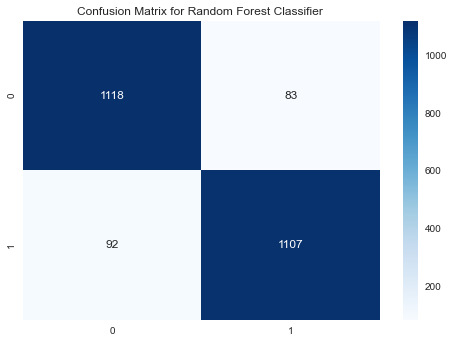

In [264]:
print("Applying Random Forest based on GridSearchCV n_estimators")
rfc = RandomForestClassifier(n_estimators=best_parameters['n_estimators'], criterion='entropy', max_features='auto', random_state=1)
rfc.fit(X_train,Y_train)
rfc_pred = rfc.predict(X_test)
cf_matrix_rfc = confusion_matrix(Y_test, rfc_pred)
print(classification_report(Y_test, rfc_pred))
sns.heatmap(cf_matrix_rfc, annot = True, cmap='Blues', fmt='g')
plt.title(label ="Confusion Matrix for Random Forest Classifier ")

Decision Tree Classifier

In [243]:
print("Apply GridSearchCV in Decision tree Classifier to get best max_depth")
classifier = tree.DecisionTreeClassifier(criterion = 'entropy')
grid_param = {'max_depth': [2,3,4,5,10,15,20,25,30,35]}
gd_sr = GridSearchCV(estimator=classifier, param_grid=grid_param, scoring='recall', cv=5)
gd_sr.fit(X_train, Y_train)
best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_ # Mean cross-validated score of the best_estimator
print(best_result)

Apply GridSearchCV in Decision tree Classifier to get best max_depth
{'max_depth': 4}
0.9099999999999999


Applying Decision Tree Classifier based on GridSearchCV max_depth
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1201
           1       0.80      0.91      0.85      1199

    accuracy                           0.84      2400
   macro avg       0.85      0.84      0.84      2400
weighted avg       0.85      0.84      0.84      2400



Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier ')

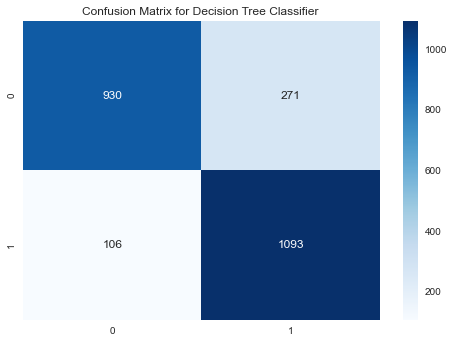

In [259]:
print("Applying Decision Tree Classifier based on GridSearchCV max_depth")
dtree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = best_parameters['max_depth'])
dtree.fit(X_train, Y_train)
dtree_pred = dtree.predict(X_test)
cf_matrix_dtree = confusion_matrix(Y_test, dtree_pred)
print(classification_report(Y_test, dtree_pred))
sns.heatmap(cf_matrix_dtree, annot = True, cmap='Blues', fmt='g')
plt.title(label ="Confusion Matrix for Decision Tree Classifier ")

Gaussian Naive Bayes

In [245]:

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
print("Applying GaussianNB with Cross Validation Score")
gnb = GaussianNB()
score=cross_val_score(gnb,X_train,Y_train,cv=10)
print("Score of Cross Validation using 10 Folds: {}".format(list(score)))
print("Mean Score: {}".format(score.mean()))
print("Standard Deviation of Score: {}".format(score.std()))

Applying GaussianNB with Cross Validation Score
Score of Cross Validation using 10 Folds: [0.8053571428571429, 0.7785714285714286, 0.8089285714285714, 0.7964285714285714, 0.8428571428571429, 0.7642857142857142, 0.7714285714285715, 0.8, 0.8053571428571429, 0.8125]
Mean Score: 0.7985714285714286
Standard Deviation of Score: 0.02161820850060223


              precision    recall  f1-score   support

           0       0.75      0.89      0.82      1201
           1       0.86      0.71      0.78      1199

    accuracy                           0.80      2400
   macro avg       0.81      0.80      0.80      2400
weighted avg       0.81      0.80      0.80      2400



Text(0.5, 1.0, 'Confusion Matrix for  Gaussian NB')

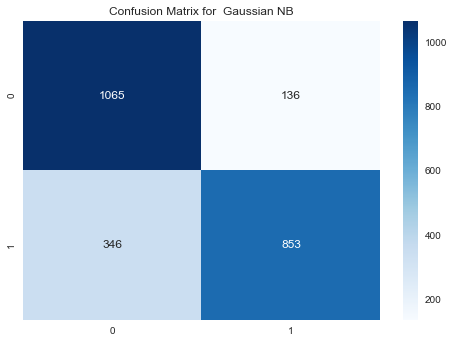

In [258]:
gnb_pred = gnb.fit(X_train, Y_train).predict(X_test)
cf_matrix_gnb = confusion_matrix(Y_test, gnb_pred)
print(classification_report(Y_test, gnb_pred))
sns.heatmap(cf_matrix_gnb, annot = True, cmap='Blues', fmt='g')
plt.title(label ="Confusion Matrix for  Gaussian NB")

Logistic Regression 

In [247]:

# prepare the cross-validation procedure
print("evaluate a logistic regression model using k-fold cross-validation")
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
lr = LogisticRegression()
# evaluate model
scores = cross_val_score(lr, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print("Score of Cross Validation using 10 Folds: {}".format(list(score)))
print("Mean Score: {}".format(score.mean()))
print("Standard Deviation of Score: {}".format(score.std()))

evaluate a logistic regression model using k-fold cross-validation
Score of Cross Validation using 10 Folds: [0.8053571428571429, 0.7785714285714286, 0.8089285714285714, 0.7964285714285714, 0.8428571428571429, 0.7642857142857142, 0.7714285714285715, 0.8, 0.8053571428571429, 0.8125]
Mean Score: 0.7985714285714286
Standard Deviation of Score: 0.02161820850060223


              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1201
           1       0.88      0.86      0.87      1199

    accuracy                           0.87      2400
   macro avg       0.87      0.87      0.87      2400
weighted avg       0.87      0.87      0.87      2400



Text(0.5, 1.0, 'Confusion Matrix for  Logistic Regression')

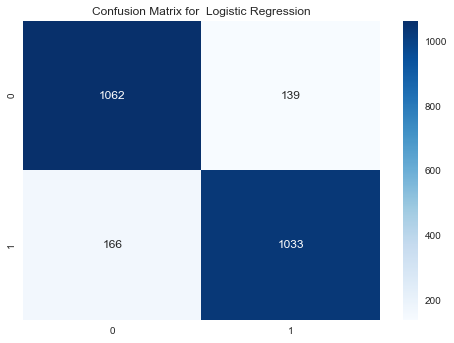

In [260]:
lr_pred=lr.fit(X_train,Y_train).predict(X_test)
cf_matrix_lr = confusion_matrix(Y_test, lr_pred)
print(classification_report(Y_test, lr_pred))
sns.heatmap(cf_matrix_lr, annot = True, cmap='Blues', fmt='g')
plt.title(label ="Confusion Matrix for  Logistic Regression")

KNN Classification

Check for best K using Cross Validation Score


Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

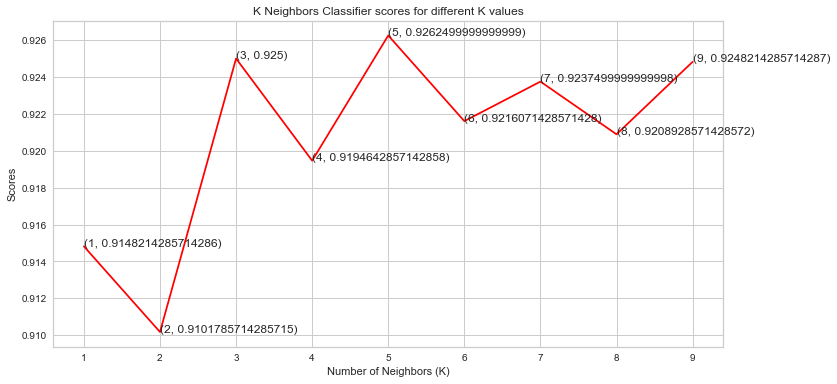

In [249]:
print("Check for best K using Cross Validation Score")
knn_scores = []
for k in range(1,10):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X_train,Y_train,cv=10)
    knn_scores.append(score.mean())

plt.figure(figsize=(12,6))
plt.plot([k for k in range(1, 10)], knn_scores, color = 'red')

for i in range(1,10):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 10)])

plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

Applying KNN with best K
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1201
           1       0.93      0.92      0.92      1199

    accuracy                           0.92      2400
   macro avg       0.92      0.92      0.92      2400
weighted avg       0.92      0.92      0.92      2400



Text(0.5, 1.0, 'Confusion Matrix for  KNeighborsClassifier')

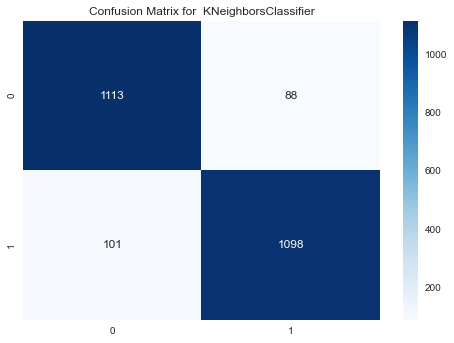

In [261]:
print("Applying KNN with best K")
knn_classifier = KNeighborsClassifier(n_neighbors = 3)
knn_classifier.fit(X_train,Y_train)
knnpred = knn_classifier.predict(X_test)

cf_matrix_knn = confusion_matrix(Y_test, knnpred)

print(classification_report(Y_test, knnpred))
sns.heatmap(cf_matrix_knn, annot = True, cmap='Blues', fmt='g')
plt.title(label ="Confusion Matrix for  KNeighborsClassifier")

# Model Evaluation & Results

In [251]:

rfc_accuracy_score=accuracy_score(Y_test,rfc_pred)

rfc_train_score=rfc.score(X_train,Y_train)

rfc_f1_score=f1_score(Y_test,rfc_pred)

rfc_recall_score=recall_score(Y_test,rfc_pred)

rfc_precision_score=precision_score(Y_test,rfc_pred)

In [252]:
dtree_accuracy_score=accuracy_score(Y_test,dtree_pred)
dtree_train_score=dtree.score(X_train,Y_train)
dtree_f1_score=f1_score(Y_test,dtree_pred)
dtree_recall_score=recall_score(Y_test,dtree_pred)
dtree_precision_score=precision_score(Y_test,dtree_pred)

In [253]:
gnb_accuracy_score=accuracy_score(Y_test,gnb_pred)

gnb_train_score=gnb.score(X_train,Y_train)

gnb_f1_score=f1_score(Y_test,gnb_pred)

gnb_recall_score=recall_score(Y_test,gnb_pred)

gnb_precision_score=precision_score(Y_test,gnb_pred)

In [254]:
lr_accuracy_score=accuracy_score(Y_test,lr_pred)

lr_train_score=lr.score(X_train,Y_train)

lr_f1_score=f1_score(Y_test,lr_pred)

lr_recall_score=recall_score(Y_test,lr_pred)

lr_precision_score=precision_score(Y_test,lr_pred)

In [255]:
knn_accuracy_score=accuracy_score(Y_test,knnpred)

knn_train_score=knn_classifier.score(X_train,Y_train)

knn_f1_score=f1_score(Y_test,knnpred)

knn_recall_score=recall_score(Y_test,knnpred)

knn_precision_score=precision_score(Y_test,knnpred)

In [256]:
results=pd.DataFrame({
    "Algorithm":["GaussianNB","KNNClassifier","RandomForestClassifier","DecisionTreeClassifier",'Logistic Regression'],
    "Accuracy":[gnb_accuracy_score,knn_accuracy_score,rfc_accuracy_score,dtree_accuracy_score,lr_accuracy_score],
    "Train Score":[gnb_train_score,knn_train_score,rfc_train_score,dtree_train_score,lr_train_score],
    "f1_Score":[gnb_f1_score,knn_f1_score,rfc_f1_score,dtree_f1_score,lr_f1_score],
     "Recall_Score":[gnb_recall_score,knn_recall_score,rfc_recall_score,dtree_recall_score,lr_recall_score],
      "Precision_Score":[gnb_precision_score,knn_precision_score,rfc_precision_score,dtree_precision_score,lr_precision_score]})

 

results.sort_values(ascending=False,by="Accuracy")

,Algorithm,Accuracy,Train Score,f1_Score,Recall_Score,Precision_Score
2,RandomForestClassifier,0.927083,1.000000,0.926748,0.923269,0.930252
1,KNNClassifier,0.921250,0.958036,0.920755,0.915763,0.925801
4,Logistic Regression,0.872917,0.874821,0.871362,0.861551,0.881399
3,DecisionTreeClassifier,0.842917,0.862143,0.852907,0.911593,0.801320
0,GaussianNB,0.799167,0.799643,0.779707,0.711426,0.862487


Text(0.5, 1.0, 'Precision-Recall curve')

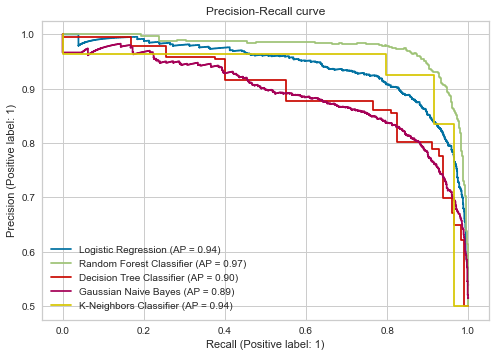

In [257]:
plot_precision_recall_curve(lr, X_test, Y_test, ax = plt.gca(),name = "Logistic Regression")

plot_precision_recall_curve(rfc, X_test, Y_test, ax = plt.gca(),name = "Random Forest Classifier")

plot_precision_recall_curve(dtree, X_test, Y_test, ax = plt.gca(),name = "Decision Tree Classifier")
plot_precision_recall_curve(gnb, X_test, Y_test, ax = plt.gca(),name = "Gaussian Naive Bayes")
plot_precision_recall_curve(knn_classifier, X_test, Y_test, ax = plt.gca(),name = "K-Neighbors Classifier")

plt.title('Precision-Recall curve')